Excercise 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
from scipy.signal import butter, filtfilt
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

In [2]:
# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/7BosHgemAseANIc')

In [3]:
with open('data/moving_lfp.pickle', "rb") as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')


Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


In [4]:
signal = lfp 
fs = 1000
time = np.linspace(0, len(signal)/fs, len(signal))


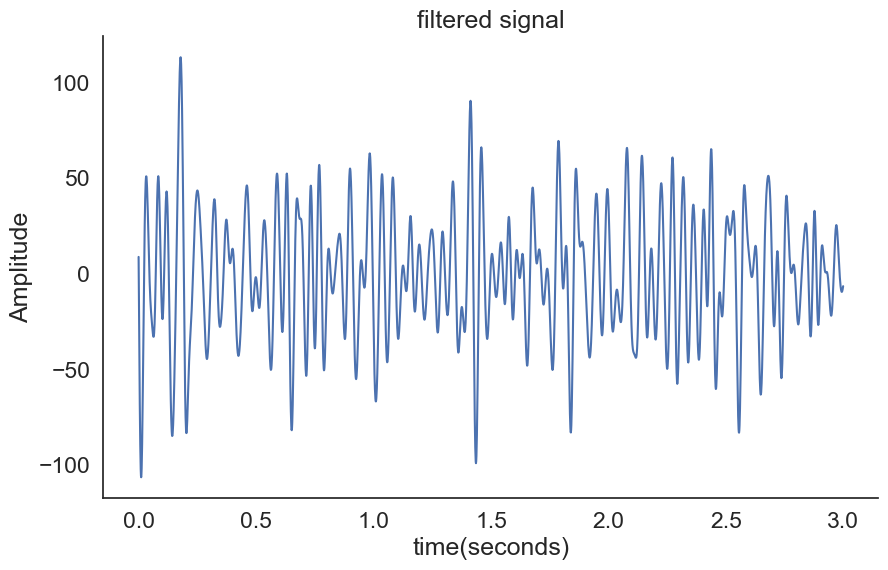

In [5]:
#define a function to create a bandpass filter

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

fs = 1000 # sampling rate

# filter parameters
lowcut = 10
highcut = 30
order = 3

#filter a few seconds of data
filtered_signal = bandpass_filter(signal[:fs*3], lowcut, highcut, fs, order)

# plotting 
plt.figure(figsize=(10,6))
plt.plot(time[:fs*3], filtered_signal)
plt.title('filtered signal')
plt.xlabel('time(seconds)')
plt.ylabel('Amplitude')
plt.show()
          
    

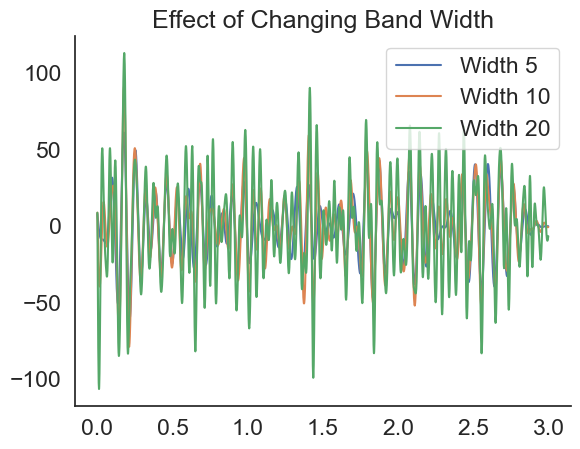

In [6]:
# Changing the width of the band
for width in [5, 10, 20]:
    filtered_signal = bandpass_filter(signal[:fs*3], 10, 10+width, fs, order)
    plt.plot(time[:fs*3], filtered_signal, label=f'Width {width}')

plt.legend()
plt.title('Effect of Changing Band Width')
plt.show()


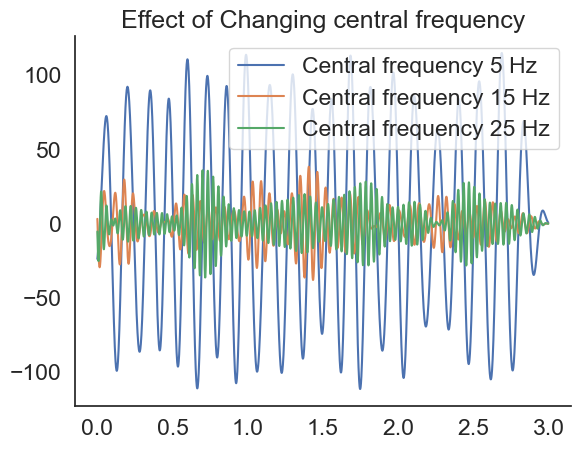

In [7]:
# effect of changing the central frequency
for central_freq in [5, 15, 25]:
    filtered_signal = bandpass_filter(signal[:fs*3], central_freq, central_freq+5, fs, order)
    plt.plot(time[:fs*3], filtered_signal, label=f'Central frequency {central_freq} Hz')

plt.legend()
plt.title('Effect of Changing central frequency')
plt.show()

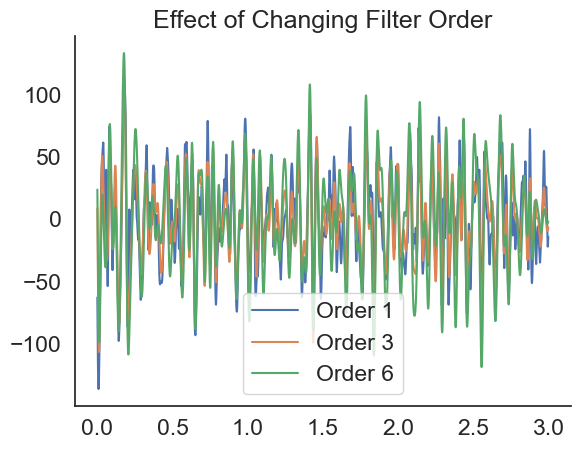

In [8]:
# effect of changing the filter order
for order in [1, 3, 6]:
    filtered_signal = bandpass_filter(signal[:fs*3], 10, 30, fs, order)
    plt.plot(time[:fs*3], filtered_signal, label=f'Order {order}')
    

plt.legend()
plt.title('Effect of Changing Filter Order')
plt.show()

227 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
262 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
309 µs ± 6.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


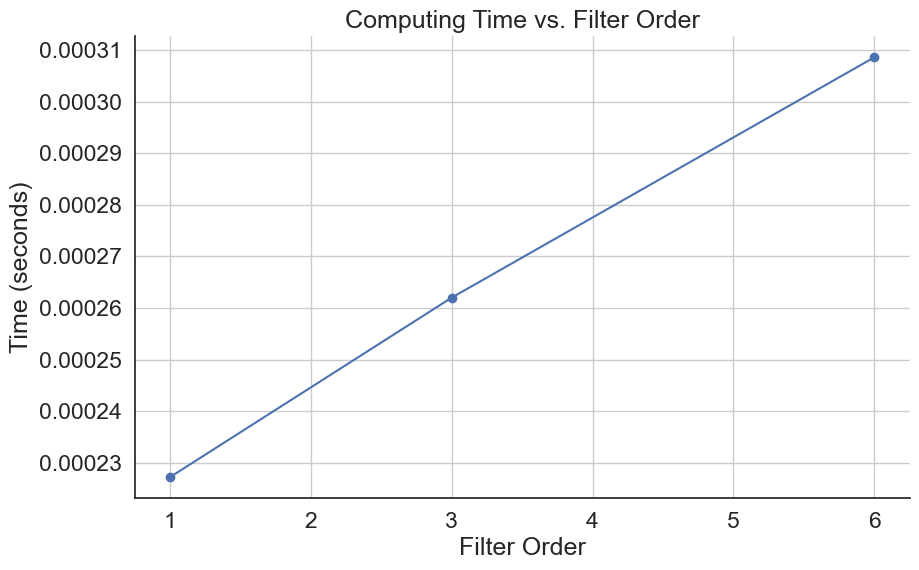

In [9]:
# quantifying computing time

# prepare lists to store results
orders = []
times = []

# Capture timing for each order using %timeit
for order in [1, 3, 6]:
    timing_result = %timeit -o bandpass_filter(signal[:fs*3], 10, 30, fs, order)
    orders.append(order)
    times.append(timing_result.average)  # Store the average time
    
plt.figure(figsize=(10, 6))
plt.plot(orders, times, marker='o')
plt.title('Computing Time vs. Filter Order')
plt.xlabel('Filter Order')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

# computing time increases with higher filter orders


Exercise 2: wavelet transform with real wavelets

In [10]:
from pywt import scale2frequency
from pywt import cwt

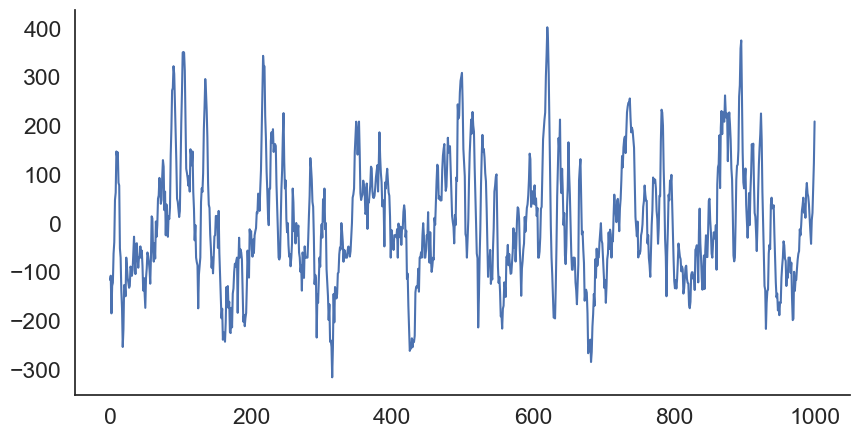

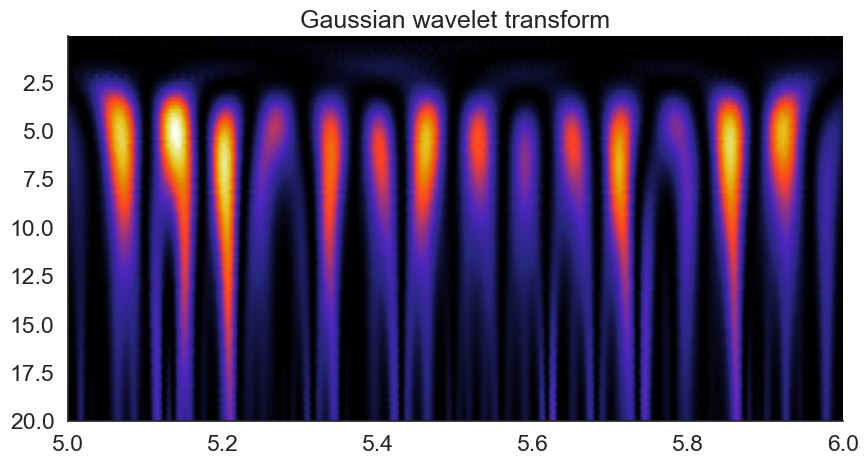

In [11]:


start = 5 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with gaussian wavelet

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title("Gaussian wavelet transform")
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

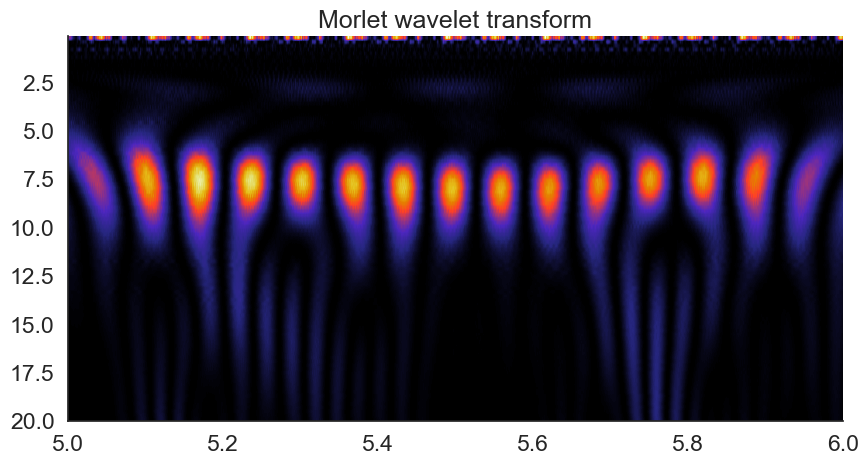

In [12]:
# spectrogram with morlet wavelet
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title("Morlet wavelet transform")
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

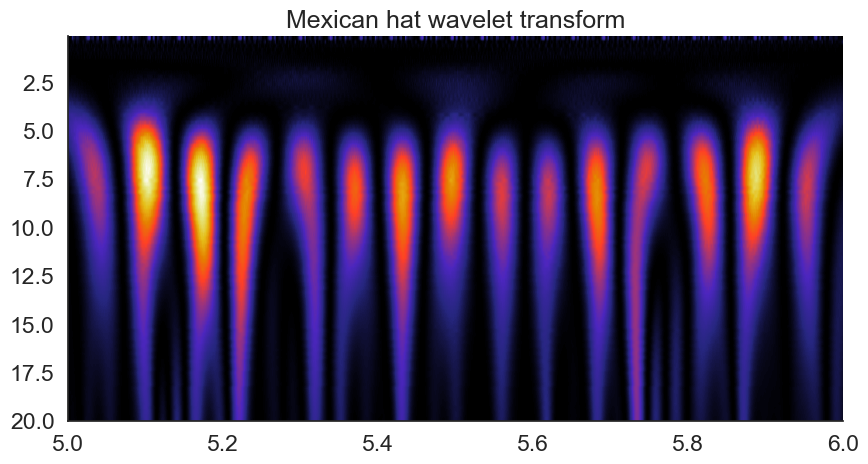

In [13]:
# spectrogram with mexican hat wavelet
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title("Mexican hat wavelet transform") 
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

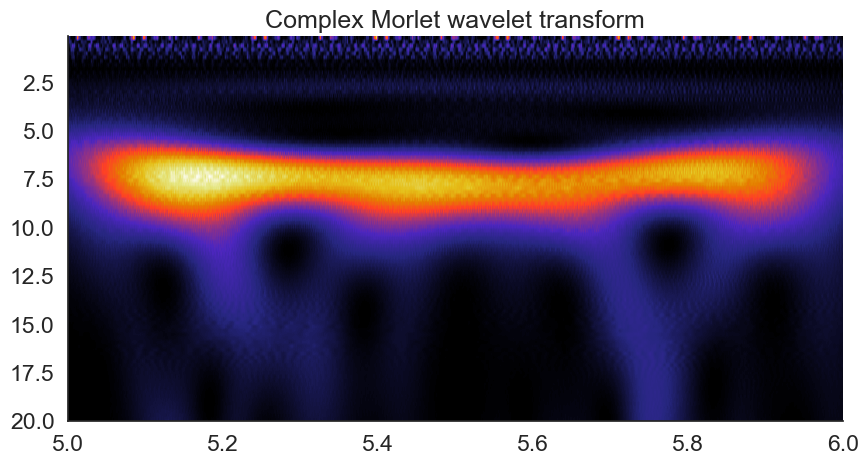

In [14]:
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.title("Complex Morlet wavelet transform")
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

The spectrum computed with real wavelets gives info about the amplitude variation over time, but lacks the phase information. 

the spectrum computed with the complex wavelet has a lower time resolution, but it provides information about the phase of the signal, thereby increasing the frequency resolution. 

Exercise 3

In [15]:
with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

sleep_lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


In [16]:
# Define function to compute instantaneous power of signal in given frequency band

def compute_ripple_power(signal,sampling_rate,low_f=100,high_f=250):
    '''Takes lfp signal and sampling rate, returns instantaneous power in the specified band 
    (default is ripple band 100-250 Hz)'''
    signal = signal - np.mean(signal) # get rid of 0 frequency component


    frequencies =  np.linspace(low_f,high_f,50)/sampling_rate
    wavelet = 'cmor1.0-1.0'
    scales = scale2frequency(wavelet, frequencies)
    cwtmatr, _ = cwt(signal, wavelet=wavelet, scales=scales,
                    sampling_period=1.0/sampling_rate)


    power = np.mean(abs(cwtmatr)**2,axis=0)

    return power

def ripple_idxs(ripple_mask):
    '''
    Takes logical ripple mask and returns a list of arrays. Each array correspond to a ripple
    and contains its time idxs (relative to the provided ripple mask)
    '''
    ripple_starts = []
    ripple_ends = []
    for i in range(1, len(ripple_mask)):
        if ripple_mask[i-1] == 0 and ripple_mask[i] == 1:
            ripple_starts.append(i)
        if ripple_mask[i-1] == 1 and ripple_mask[i] == 0:
            ripple_ends.append(i)

    # handle edge cases
    if len(ripple_ends) > len(ripple_starts):
        ripple_starts = [0]+ripple_starts  # if session starts with a ripple

    if len(ripple_ends) < len(ripple_starts):
        ripple_ends.append(len(ripple_mask))  # if session ends with a ripple

    ripples = [np.arange(ripple_starts[i], ripple_ends[i])
               for i in range(len(ripple_starts))]

    return ripples

# define function that filters out the ripples with a duration below treshold

def clean_ripples(ripples,lfp,ripple_len_th=None,amplitude_th=None):
    '''takes list of ripples and corresponding signal, returns list of ripples cleaned of ripple that are shorter than specified 
    duration threshold or with amplitude larger than specified amplitude threshold (usually artifacts)'''
    clean_ripples = [r for r in ripples if (len(r)>ripple_len_th and \
                    max(lfp[r])< amplitude_th and min(lfp[r])>-amplitude_th)] 
    return clean_ripples

In [17]:
from scipy.stats import zscore

ripple_th = 2

theta_power = compute_ripple_power(sleep_lfp,sampling_rate, low_f=6, high_f=10)
theta_power = zscore(theta_power)
delta_power = compute_ripple_power(sleep_lfp,sampling_rate, low_f=2, high_f=4)
delta_power = zscore(delta_power)


ripple_mask_theta = np.asarray([True if x>ripple_th else 0 for x in theta_power])
ripple_mask_delta = np.asarray([True if x>ripple_th else 0 for x in delta_power])

theta_ripples = ripple_idxs(ripple_mask_theta)
theta_ripples = clean_ripples(theta_ripples,sleep_lfp,ripple_len_th=30, amplitude_th=1000)

delta_ripples = ripple_idxs(ripple_mask_delta)
delta_ripples = clean_ripples(delta_ripples,sleep_lfp,ripple_len_th=30, amplitude_th=1000)

print(f'detected {len(theta_ripples)} theta ripples and {len(delta_ripples)} delta ripples')

detected 50 theta ripples and 5 delta ripples


In [18]:
print(delta_power)
print(theta_power)

[-0.21967802 -0.22080376 -0.22032879 ... -0.21989437 -0.22098483
 -0.2210543 ]
[-0.23983102 -0.23844034 -0.23626915 ... -0.17977461 -0.18084738
 -0.1843702 ]


Text(0, 0.5, 'theta power - delta power')

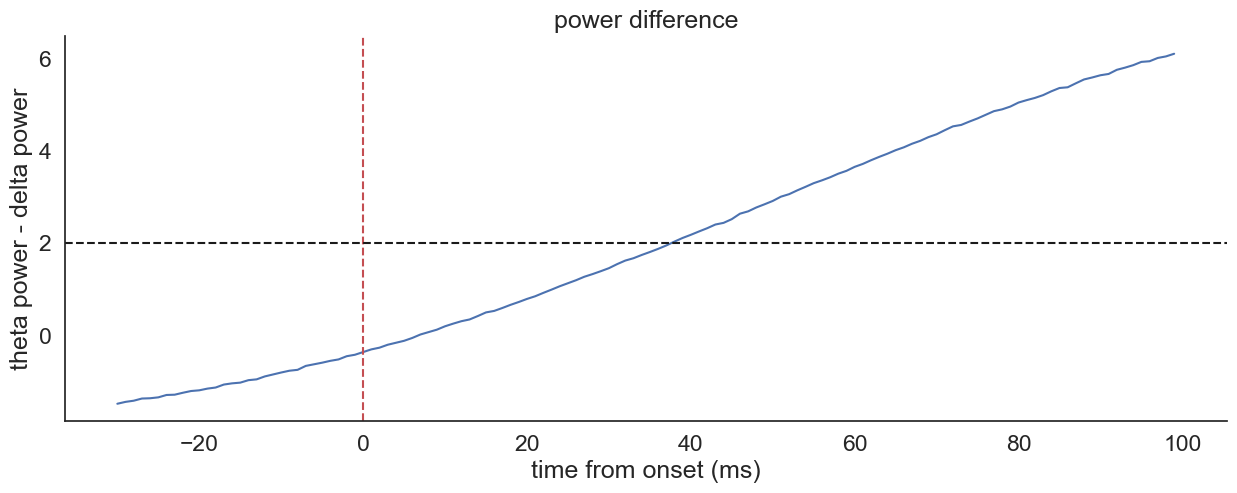

In [19]:
ripple_n = 1

power_difference = theta_power - delta_power

plt.figure(figsize=(15,5))
onset = theta_ripples[ripple_n][0]
x = np.arange(-30,100)
y = power_difference[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.axhline(y=2,linestyle='--',c='k',label='ripple th')

plt.title('power difference')
plt.xlabel('time from onset (ms)')
plt.ylabel('theta power - delta power') 


In [51]:
def get_continuous_periods(mask):
    ''' Find the indices where the mask changes from False to True and True to False, 
    returns a list of arrays, each containing the indices for a true period'''
    changes = np.diff(mask.astype(int))
    starts = np.where(changes == 1)[0] + 1  # Start indices of each True period
    ends = np.where(changes == -1)[0] + 1   # End indices of each True period

    # Handle the case where the signal starts or ends with a True period
    if mask[0]:
        starts = np.insert(starts, 0, 0)  # Adding 0 at the start if the first element is True
    if mask[-1]:
        ends = np.append(ends, len(mask))  # Adding the last index if the last element is True

    # Return the list of arrays, each containing the indices for a True period
    return [np.arange(start, end) for start, end in zip(starts, ends)]


def compute_sleep_periods(power_difference, sampling_rate, threshold):
    ''' Compute and classify periods of REM and NREM sleep based on the power difference 
    between theta and delta frequency bands from LFP data. 
    returns lists of np.ndarrays that contain indices defining the rem and nrem periods,
    and two lists of floats that represent the durations of each REM and NREM period'''

    rem_mask = power_difference > threshold

    rem_periods = get_continuous_periods(rem_mask)
    nrem_periods = get_continuous_periods(~rem_mask)

    rem_durations = [len(period) / sampling_rate for period in rem_periods]
    nrem_durations = [len(period) / sampling_rate for period in nrem_periods]

    return rem_periods, nrem_periods, rem_durations, nrem_durations



In [37]:
# filter signal of sleep session
order = 5
fs = 1000
lowcut= 1
highcut = 200

rem_periods, nrem_periods, rem_durations, nrem_durations = compute_sleep_periods(power_difference, sampling_rate=sampling_rate, threshold=0.2)

filtered_lfp = bandpass_filter(sleep_lfp, lowcut, highcut, fs, order)

In [52]:
from scipy.ndimage import uniform_filter1d

# Smoothing the power difference
smoothed_power_diff = uniform_filter1d(power_difference, size=5)  # Adjust 'size' as needed

# Adjust threshold based on new inspection
new_threshold = 0.2 # Adjust percentile as needed

# Compute new REM and NREM periods
rem_periods, nrem_periods, rem_durations, nrem_durations = compute_sleep_periods(smoothed_power_diff, sampling_rate, new_threshold)



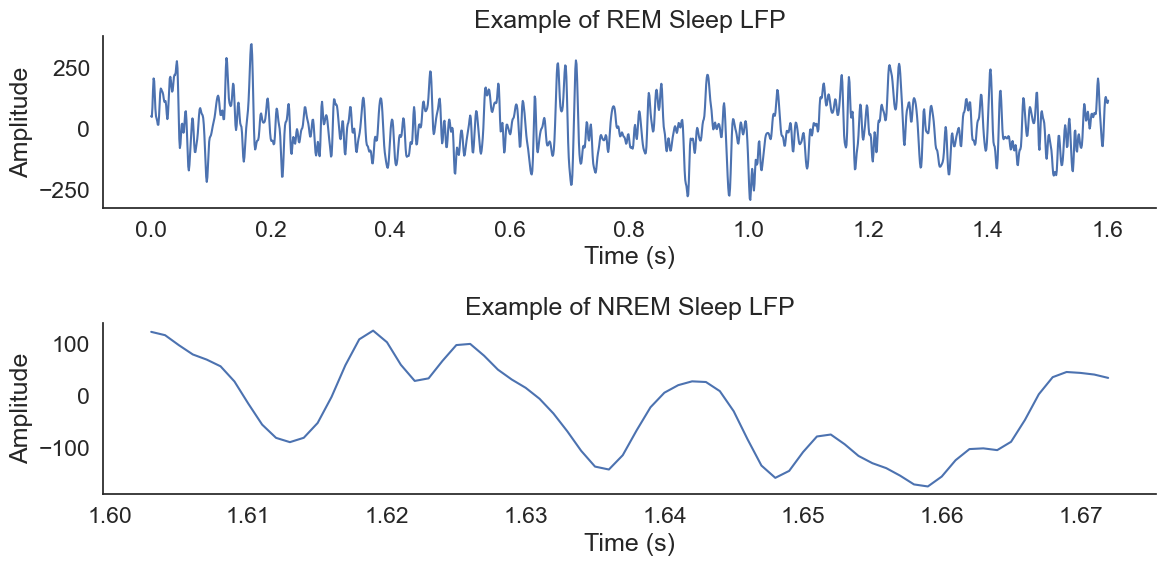

In [53]:
def plot_segments(lfp, rem_periods, nrem_periods, sampling_rate):
    plt.figure(figsize=(12, 6))
    
    # Plot an example of REM
    if rem_periods and len(rem_periods[0]) > 1:  # Check if there is a REM period and it's not just a single point
        rem_example = rem_periods[0]
        rem_indices = np.arange(rem_example[0], rem_example[-1] + 1)
        rem_time = rem_indices / sampling_rate
        plt.subplot(2, 1, 1)
        plt.plot(rem_time, lfp[rem_example[0]:rem_example[-1] + 1])
        plt.title('Example of REM Sleep LFP')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
    
    # Plot an example of NREM
    if nrem_periods and len(nrem_periods[0]) > 1:  # Check if there is a NREM period and it's not just a single point
        nrem_example = nrem_periods[0]
        nrem_indices = np.arange(nrem_example[0], nrem_example[-1] + 1)
        nrem_time = nrem_indices / sampling_rate
        plt.subplot(2, 1, 2)
        plt.plot(nrem_time, lfp[nrem_example[0]:nrem_example[-1] + 1])
        plt.title('Example of NREM Sleep LFP')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Example usage
plot_segments(filtered_lfp, nrem_periods, rem_periods, sampling_rate)

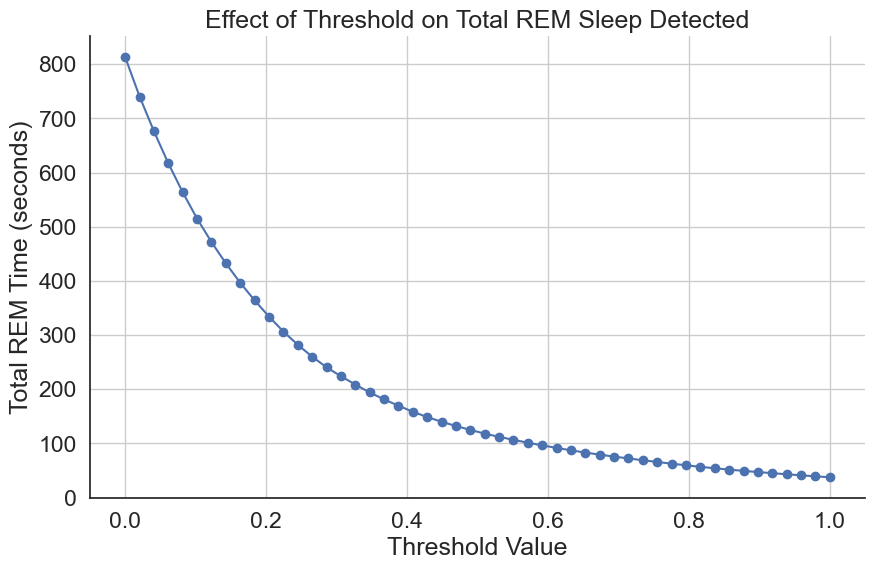

In [54]:
# exploring threshold effect

thresholds = np.linspace(0, 1, 50)  # 50 thresholds between 0 and 1
rem_durations = []

for threshold in thresholds:
    rem_periods, nrem_periods, rem_durations_for_threshold, nrem_durations = compute_sleep_periods(power_difference, sampling_rate, threshold)
    total_rem_time = sum(rem_durations_for_threshold)  # Summing all REM durations
    rem_durations.append(total_rem_time)
    
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rem_durations, marker='o', linestyle='-')
plt.title('Effect of Threshold on Total REM Sleep Detected')
plt.xlabel('Threshold Value')
plt.ylabel('Total REM Time (seconds)')
plt.grid(True)
plt.show()



there is an inverse nonlinear relationship between The total amount of REM sleep detected and the threshold.